# Purwadhika Data Science & Machine Learning
# Capstone 2 - NYC TLC Trip Record
## by Haiwal Fezra


# Latar Belakang
**Taksi** merupakan salah satu moda transportasi umum yang sudah menjadi bagian dari kehidupan untuk banyak warga Kota New York. Penggunaan Taksi pada Kota New York sudah menjadi pilihan yang cepat dan ringkas untuk mencapai berbagai bagian Kota New York. Penyedia jasa Taksi New York meminta pada Data Analyst Purwadhika untuk melihat frekuensi dan kebiasaan pemakaian taksi warga New York.

## Perumusan Masalah
Penyedia Jasa Taksi ingin mengetahui **Hari sibuk dan Jam Sibuk penggunaan Taksi dan bagian kota mana yang menggunakan Taksi paling banyak**, guna mengefisiensikan pengemudi taksi, untuk di kirimkan pada waktu dan tempat yang strategis.

Maka pertanyaan besar yang harus dijawab oleh Data Analyst Purwadhika adalah:

***
**1. Kapan Taksi paling banyak digunakan?**

**2. Di daerah mana Taksi paling banyak digunakan?**

**3. Berapa rata-rata Pendapatan taksi per daerah?**
***

## Goal
dan untuk tujuan dari analisis ini ialah:

***
**1. Meningkatkan penggunaan taksi sebagai moda transportasi umum Kota New York**

**2. Mengetahui target pemasaran berikut secara tepat**

***

# Data
Untuk menjawab permasalahan diatas, kita akan menganalisa data yang sudah dikumpulkan oleh Penyedia jasa Taksi, yang dapat diakses pada [link](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N?usp=sharing) berikut.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [3]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

Dataset NYC TLC Trip Record berisikan informasi penggunaan taksi selama bulan Januari 2023.

Terdapat 20 kolom pada dataset NYC TLC Trip Record, yang dijelaskan pengertiannya sebagai berikut:
1. `VendorID` : ID unik untuk setiap penyedia Jasa layanan Taksi
1. `lpep_pickup_datetime` : Waktu penjemputan penumpang dalam tanggal dan waktu
1. `lpep_dropoff_datetime` : Waktu penurunan penumpang dalam tanggal dan waktu
1. `store_and_fwd_flag` : Indikator untuk apakah data perjalanan disimpan pada Taksi terlebih dahulu atau tidak
1. `RatecodeID` : ID unik untuk Rate harga perjalanan
1. `PULocationID` : ID unik untuk tempat penjemputan penumpang
1. `DOLocationID` : ID unik untuk tempat penurunan penumpang
1. `passenger_count` : Jumlah penumpang dalam perjalanan
1. `trip_distance` : Jumlah jarak perjalanan dalam mil
1. `fare_amount` : Jumlah Tarif dasar perjalanan berdasarkan waktu dan jarak perjalanan
1. `extra` : Jumlah tambahan tarif selain tarif dasar perjalanan
1. `mta_tax` : Jumlah pajak dari Metropolitan Transportation Authority (MTA)
1. `tip_amount` : Jumlah tips yang diberikan penumpang ke pengemudi
1. `tolls_amount` : Jumlah tarif toll selama perjalanan
1. `ehail_fee` : Jumlah tambahan tarif untuk penggunaan aplikasi mobile untuk memanggil taksi
1. `improvement_surcharge` : Jumlah tarif yang digunakan untuk mengembangkan industri taksi
1. `total_amount` : Jumlah keseluruhan tarif yang dibayarkan oleh penumpang
1. `payment_type` : Jenis pembayaran yang dilakukan oleh penumpang
1. `trip_type` : Jenis pemanggilan taksi yang dilakukan oleh penumpang
1. `congestion_surcharge` : Jumlah tarif yang diberikan ketika Taksi melewati daerah kemacetan di New York

## Data Understanding and Cleaning

In [347]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [245]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [246]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

Gambaran secara umum untuk Dataset NYC TLC Trip Record adalah:
* dataset memiliki **20** kolom dan **68.211** baris
* beberapa kolom, yaitu, `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, dan `congestion_surcharge` memiliki beberapa data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* untuk `ehail_fee` seluruhnya ialah data kosong, sehingga bisa dihapus.
* kolom-kolom `fare_amount`, `extra`, `mta_tax`, dan `tip_amount` memiliki data bernilai minus, dimana hal tersebut tidak mungkin terjadi (kemungkinan kesalahan penulisan), sehingga kolom-kolom tersebut harus diubah ke dalam nilai absolut.
* beberapa kolom tidak relevan untuk penyelesaian rumusan masalah sehingga bisa dihapus, yaitu kolom `VendorID`, `store_and_fwd_flag`, `RatecodeID`, `improvement_surcharge`, `payment_type`, `trip_type`, dan `congestion_surcharge`.

### Missing Value

In [213]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

<Axes: >

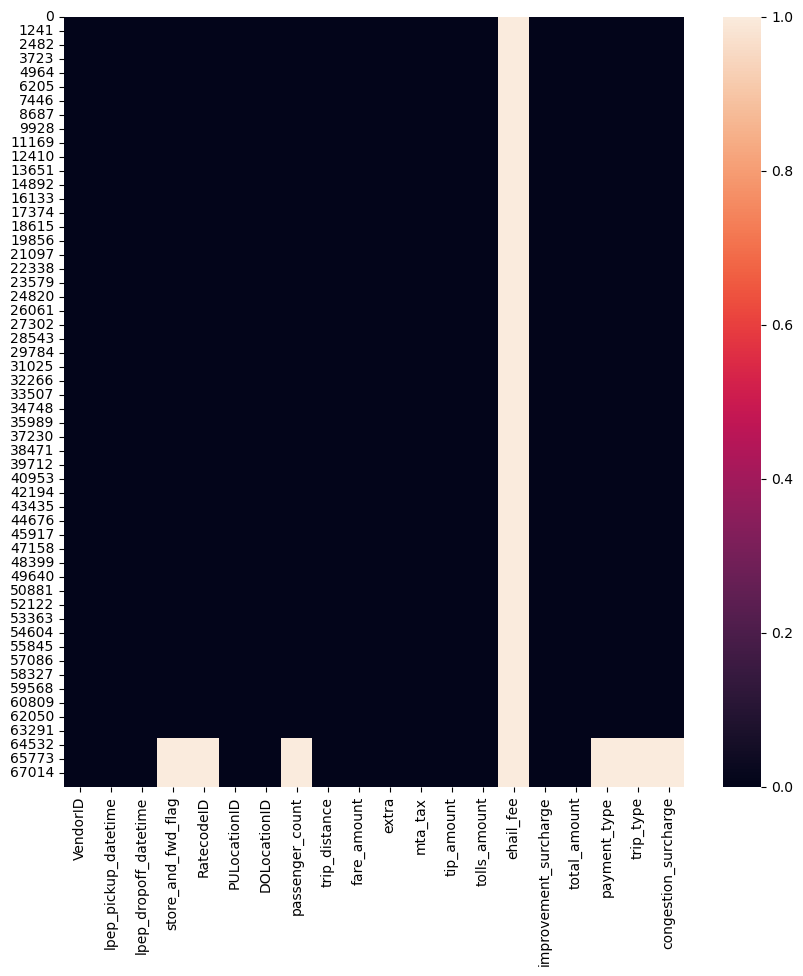

In [214]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge']].isna())

Missing Value pada dataset ini secara garis besar:  
* pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, dan `congestion_surcharge` memiliki proporsi yang cukup kecil (**<10%**), sedangkan missing value pada kolom `ehail_fee` mencapai **100%**.

Untuk menangani missing value pada dataset ini, dapat digunakan 2 cara, yaitu:
* Mengisi missing value dengan simple imputer pada missing value yang proporsinya cukup kecil, dengan cara memasukan nilai mean/median/modus. dengan cara ini besar harapannya nilai yang diisi pada missing value akan mendekati nilai yang sebenarnya.
* Menghapus kolom secara keseluruhan pada kolom yang 100% missing value, dikarenakan kolom tidak relevan dan kolom tidak dapat diisi dengan imputer manapun.

### Handling data bernilai minus

kolom-kolom `fare_amount`, `extra`, `mta_tax`, dan `tip_amount` memiliki data bernilai minus, hal tersebut mungkin terjadi dikarenakan kesalahan penulisan, dan bisa diubah ke nilai absolutnya sehingga diharapkan data tersebut menjadi nilai aslinya.

In [7]:
# menjadikan nilai kolom absolut
df[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'total_amount']] = df[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'total_amount']].abs()
df[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'total_amount']].min()
# nilai terkecil pada kolom sudah bernilai 0.0

fare_amount     0.0
extra           0.0
mta_tax         0.0
tip_amount      0.0
total_amount    0.0
dtype: float64

### Handling missing value pada kolom yang relevan

Kolom yang memiliki relevansi pada rumusan masalah dan memiliki missing value hanya pada kolom `passenger_count` dan `congestion_surcharge`, sehingga perlu diisi dengan data dengan metode simple imputer.

Pertama-tama perlu dilihat apakah kolom `passenger_count` dan `congestion_surcharge` memiliki sebaran data yang normal atau tidak.

**Passenger Count**

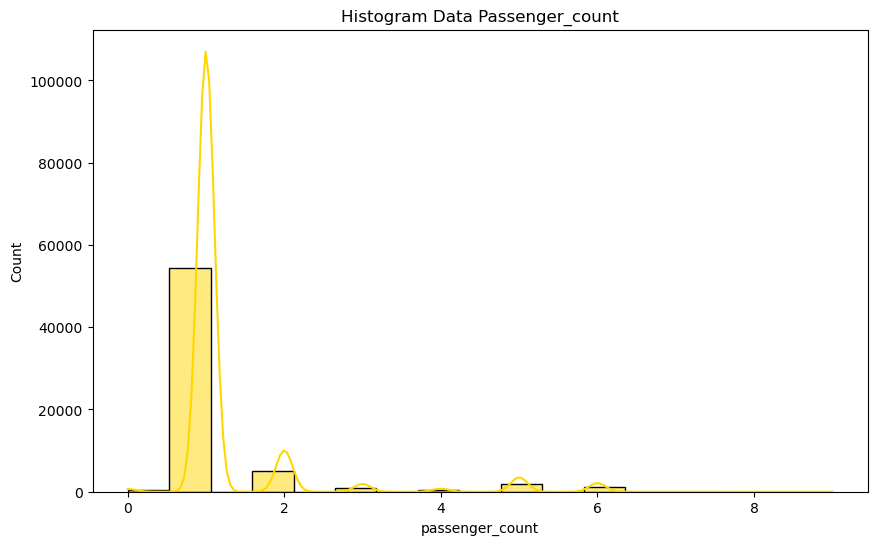

In [248]:
plt.figure(figsize=(10, 6))
sns.histplot(df['passenger_count'], kde=True, color='#FFD700')
plt.title("Histogram Data Passenger_count")
plt.show()

Dapat terlihat bahwa jumlah penumpang lebih banyak berjumlah kurang dari 2 orang, dan dengan data tidak terdistribusi normal, kita akan menggunakan simple imputer dengan metode **median**.

In [58]:
# nilai median
df['passenger_count'].median()

1.0

In [8]:
# memasukan nilai median pada kolom Passenger_count
imputer = SimpleImputer(strategy='median')
df['passenger_count'] = imputer.fit_transform(df[['passenger_count']])

In [217]:
# Cek apakah masih ada missing value pada kolom Passenger_count
df['passenger_count'].isna().sum()

0

**Congestion Surchanger**

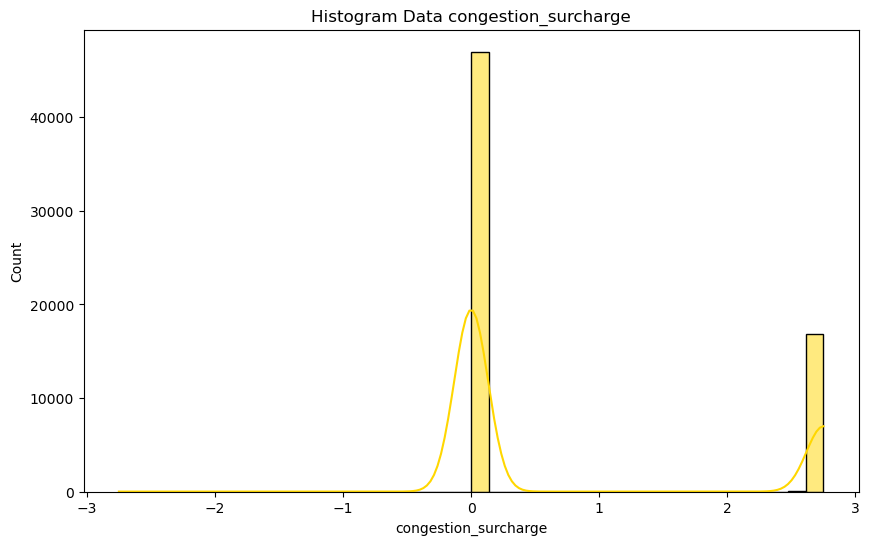

In [447]:
plt.figure(figsize=(10, 6))
sns.histplot(df['congestion_surcharge'], kde=True, color='#FFD700')
plt.title("Histogram Data congestion_surcharge")
plt.show()

Dapat terlihat bahwa data congestion_surcharge lebih banyak berjumlah kurang 0, dan dengan data tidak terdistribusi normal, kita akan menggunakan simple imputer dengan metode **median**.

In [223]:
# nilai median
df['congestion_surcharge'].median()

0.0

In [9]:
# memasukan nilai median pada kolom congestion_surcharge
imputer = SimpleImputer(strategy='median')
df['congestion_surcharge'] = imputer.fit_transform(df[['congestion_surcharge']])

In [225]:
# Cek apakah masih ada missing value pada kolom congestion_surcharge
df['congestion_surcharge'].isna().sum()

0

### Menghapus kolom yang tidak relevan
* untuk kolom-kolom `VendorID`, `store_and_fwd_flag`, `RatecodeID`, `payment_type`, dan `trip_type` tidak memiliki relevansi untuk penyelesaian rumusan masalah sehingga bisa dihapus. Beberapa alasan untuk penghapusan beberapa kolom ini ialah:
    * `VendorID` : kolom ini terdiri atas 2 unique value yaitu ID 1 dan ID 2, yang masing masing mewakili ID penyedia jasa Taksi di New York, akan tetapi hal ini tidak mempengaruhi analisis dimana analisis dilakukan secara menyeluruh dan tidak melihat asal penyedia jasa layanan taksi.
    * `store_and_fwd_flag` : kolom ini untuk memberikan *flag*(tanda) bahwa data pada baris tersebut apakah diterima secara langsung oleh server atau disimpan terlebih dahulu dalam memory di mobil taksi, dan untuk analisis ini tidak melihat apakah data terkait penyimpanan data sehingga tidak relevan.
    * `RatecodeID` : pada kolom ini terdapat 6 ID unique yang dapat diartikan sebagai kode dijadikan dasar perhitungan nilai 'fare_amount', akan tetapi hal ini tidak mempengaruhi analisis, dimana analisis hanya melihat nilai 'fare_amount' itu sendiri dan bukan bagaimana perhitungannya.
    * `payment_type` : kolom ini berisikan data tentang bagaimana penumpang membayarkan jumlah `total_amount` ke penyedia jasa layanan taksi, dimana hal ini tidak relevan dengan analisis yang hanya melihat nilai `total_amount`.
    * `trip_type` : kolom ini terdiri atas 2 kode yang dapat diartikan bagaimana penumpang memanggil taksi, yaitu melalui booking atau langsung menghentikan taksi, sehingga untuk kolom ini dinilai tidak relevan dengan analisis.
* dan untuk kolom `ehail_fee` bisa dihapus juga karena keseluruhan kolomnya ialah missing value.

In [10]:
# menghapus kolom-kolom
df.drop(columns=['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type', 'ehail_fee'],inplace=True)

In [11]:
# cek jumlah missing value pada dataset
df.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

Data sudah dibersihkan dari missing value, akan tetapi masih terdapat data-data yang masih harus dirapihkan kembali sebelum kita memulai analisis.

### Nilai 0 pada kolom passenger_count

In [451]:
df['passenger_count'].value_counts()

passenger_count
1.0    58623
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

Terdapat **336** data yang bernilai 0. dan untuk nilai 0 ini tidak akan kita ubah karena masih ada kemungkinan bahwa taksi hanya **mengantarkan barang** milik penumpang, jadi untuk data bernilai 0 ini akan kita **biarkan apa adanya**.

### Nilai 0 pada kolom total_amount dan trip_distance 

sedangkan pada `total amount` dan `trip distance`, nilai 0 ini tidak memungkinkan dikarenakan tidak mungkin ada perjalanan yang 0 mil dan tidak mungkin juga ada pembayaran yang 0\$ untuk ini perlu dilakukan proses imputasi sederhana atau dilakukan drop row pada baris yang tidak memungkinkan dimasukan data.

**Total Amount**

untuk Total Amount mari kita lihat jumlah baris yang memiliki nilai Total Amount yang sama dengan 0.

In [12]:
# cek jumlah data bernilai 0
(df['total_amount'] == 0).sum()

69

Terdapat 69 baris yang memiliki nilai 0, untuk mengisi kolom ini cukup mudah karena kolom ini merupakan nilai total dari nilai kolom-kolom lainnya, yaitu kolom `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, dan `congestion_surcharge`.

untuk itu, cukup dilakukan penjumlahan diantara kolom-kolom diatas.

In [13]:
condition = df['total_amount'] == 0

df.loc[condition, 'total_amount'] = df.loc[condition, ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']].sum(axis=1)

In [14]:
# cek kembali
(df['total_amount'] == 0).sum()

69

ternyata total_amount yang bernilai 0 tetap **tidak berubah jumlahnya**, untuk itu mari kita lihat bagaimana data-data itu terlihat di dataset.

In [455]:
df[['fare_amount','extra','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','total_amount']][df['total_amount'] == 0]

,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount
1581,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2130,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2793,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3557,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3674,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
59955,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60098,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60315,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61178,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Terlihat dari dataset bahwa ke 69 baris tersebut juga memiliki 7 kolom lainnya bernilai 0, untuk ini maka baris-baris ini dapat dihapus.

In [15]:
# menghapus nilai 0 dari total_amount
df = df.loc[df['total_amount'] != 0]

In [16]:
# cek kembali
(df['total_amount'] == 0).sum()

0

**Trip Distance**

dan selanjutnya untuk Trip Distance, mari kita lihat juga jumlah baris yang memiliki nilai Trip distance = 0.

In [17]:
# cek jumlah data bernilai 0
(df['trip_distance'] == 0).sum()

3290

In [459]:
# persentase trip distance bernilai 0
(df['trip_distance']==0).sum()/len(df['trip_distance'])*100

4.828152974670541

untuk trip distance yang bernilai 0, tidak terlalu banyak yaitu sebanyak 3.290 baris atau 4,82% dari keseluruhan data di kolom trip distance dan juga akan sulit untuk menentukan nilai yang ingin diinput, sehingga bisa kita drop untuk baris yang bernilai 0.

In [18]:
# menghapus baris yang bernilai 0
df = df.loc[df['trip_distance'] != 0]

In [19]:
# cek kembali jumlah data bernilai 0
(df['trip_distance'] == 0).sum()

0

In [20]:
# cek perbandingan 
df[['trip_distance','fare_amount']]

,trip_distance,fare_amount
0,2.58,14.90
1,1.81,10.70
3,1.30,6.50
4,1.10,6.00
5,2.78,17.70
...,...,...
68206,4070.82,15.70
68207,2.14,4.41
68208,3.44,16.53
68209,3.03,14.98


terlihat sekilas pada perbandingan diatas bahwa terdapat `trip_distance` dengan nilai extreme (**outlier**) yaitu **4.070 mil** dan dengan `fare_amount` yang tergolong normal, yang menjadikan nilai ekstrim itu kemungkinan besar adalah kesalah input.

untuk memproses outlier tersebut, mari kita lihat data secara keseluruhan melalui boxplot.

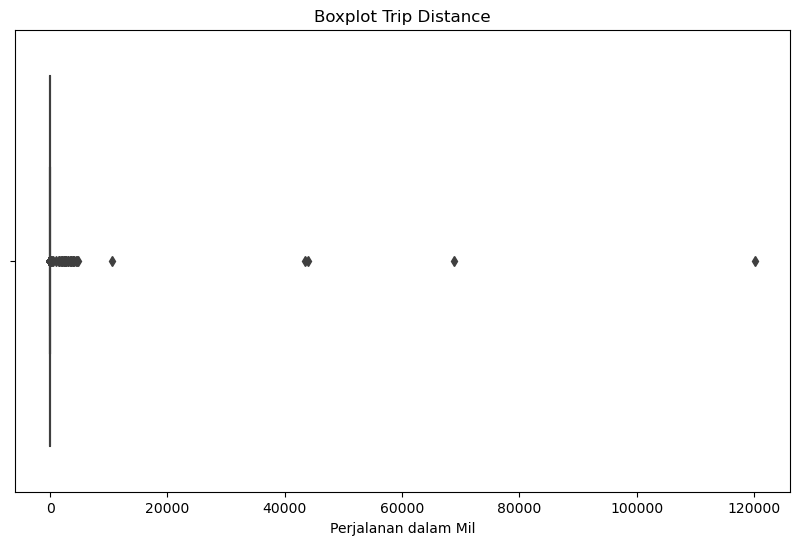

In [394]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['trip_distance'])
plt.title("Boxplot Trip Distance")
plt.xlabel("Perjalanan dalam Mil")
plt.show()

Terlihat bahwa boxplot dipenuhi dengan data-data yang bernilai sangat ekstrim.

untuk itu mari kita coba melihat jumlah `trip_distance` yang bernilai diatas 50 mil.

In [21]:
# cek jumlah data bernilai diatas 50
(df['trip_distance'] > 50).sum()

40

In [22]:
# cek data-data bernilai diatas 50
df[['trip_distance', 'fare_amount']][(df['trip_distance'] > 50)]

,trip_distance,fare_amount
7322,66.18,15.00
33373,1571.97,29.97
43013,57.09,205.30
48770,53.72,0.01
63995,579.63,28.49
64446,2555.47,23.68
64558,3077.89,12.02
64572,2606.52,11.00
64609,43392.12,12.02
64695,137.95,44.90


dari data diatas sekilas terlihat bahwa dari 40 data pencilan, masih ada data yang terlihat normal, yaitu dengan `fare_amount` diatas 100$.

In [23]:
# cek jumlah data bernilai normal
df[(df['trip_distance'] > 50) & (df['fare_amount'] > 100)]

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
43013,2023-01-22 10:39:49,2023-01-22 11:48:18,82,265,1.0,57.09,205.3,0.0,0.5,0.0,0.0,1.0,206.8,0.0


Terlihat diatas bahwa data dengan jarak perjalanan diatas 50 mil seharusnya memiliki tarif dasar yang setidaknya diatas 100$.

untuk itu, maka data `trip_distance` yang tidak berkorelasi dengan nilai `fare_amount` untuk dapat dihapus.

In [24]:
# menghapus data data pencilan trip_distance yang tidak berkorelasi dengan fare_amount
df = df.loc[~((df['trip_distance'] > 50) & (df['fare_amount'] < 100))]

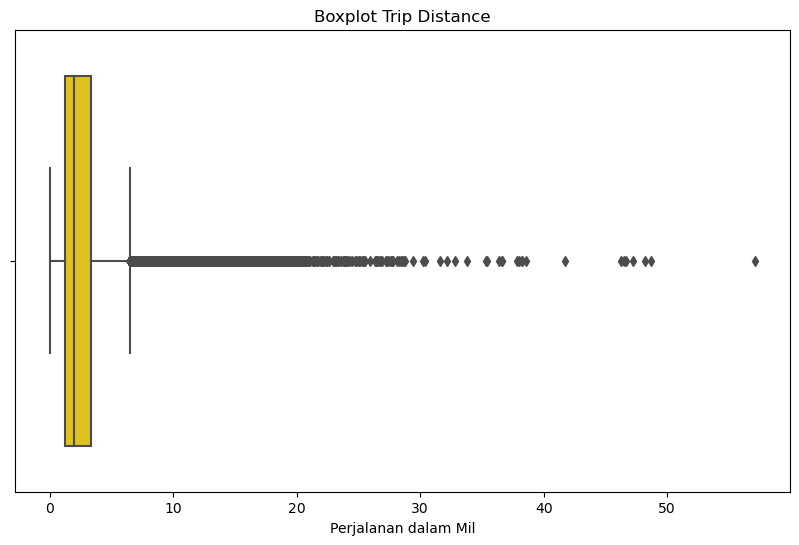

In [25]:
#cek kembali data pencilan dengan Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['trip_distance'], color='#FFD700')
plt.title("Boxplot Trip Distance")
plt.xlabel("Perjalanan dalam Mil")
plt.show()

In [488]:
df['trip_distance'].median()

1.93

Terlihat melalui boxplot bahwa masih terdapat data pencilan pada `trip_distance` yang jaraknya tidak seekstrim pada data sebelum dihapus dan terlihat memiliki nilai median pada 1,93 mil.

## Binning data Trip Distance

setelah dipastikan bahwa data trip_distance sudah bernilai diatas 0, mari kita kategorikan panjang perjalanan menjadi tiga kategori yaitu perjalanan **pendek, medium, dan panjang**. 

kategori ini akan didasarkan pada **sebaran persentil** kurangnya domain knowledge pada analis tentang berapa jarak yang dapat dikategorikan pendek ataupun panjang dan agar penggunaan data 'trip distance' ini tidak terpengaruh akan outlier yang ada didalamnya. hal ini seharusnya tidak menjadi masalah dimana pada analisis ini kita hanya akan melihat banyaknya sebaran jenis trip pada setiap borough. 

In [26]:
# membuat batasan dari nilai percentil
bin_edges = np.percentile(df['trip_distance'], [0, 25, 75, 100])

# membuat kolom baru berdasarkan tiga label binning
df['distance_category'] = pd.cut(df['trip_distance'], bins=bin_edges, labels=['Short', 'Medium', 'Long'], right=False)

In [27]:
# cek apakah ada data null
df['distance_category'].isnull().sum()

1

In [28]:
# cek data yang bernilai null
df[df['distance_category'].isnull()]

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,distance_category
43013,2023-01-22 10:39:49,2023-01-22 11:48:18,82,265,1.0,57.09,205.3,0.0,0.5,0.0,0.0,1.0,206.8,0.0,NaN


ternyata untuk **data bernilai maksimum** tidak masuk kedalam kategori, oleh karena itu kita akan masukan ke dalam kategori 'long' secara manual.

In [29]:
df['distance_category'].fillna('Long', inplace=True)

In [30]:
# cek kembali data null
df['distance_category'].isnull().sum()

0

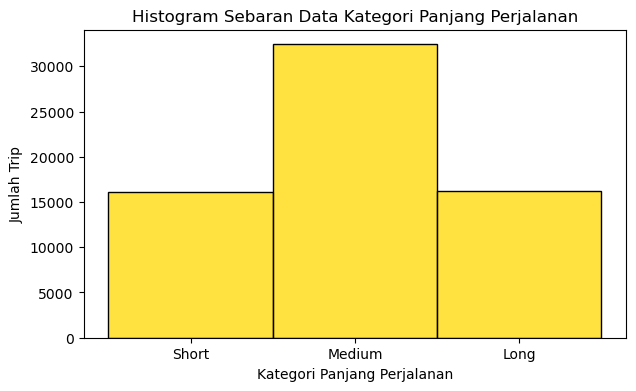

In [531]:
# buat histogram untuk melihat sebaran data
plt.figure(figsize=(7, 4))
sns.histplot(df['distance_category'], bins=range(0, 3), discrete=True, color='#FFD700')
plt.title('Histogram Sebaran Data Kategori Panjang Perjalanan')
plt.xlabel('Kategori Panjang Perjalanan')
plt.ylabel('Jumlah Trip')
plt.xticks(range(0, 3))
plt.show()

sesuai dengan perkiraan, bahwa terlihat pada histogram untuk sebaran data kategori panjang perjalanan ialah normal, yang dikarenakan menggunakan binning dengan percentil.

### Mengubah data ID lokasi menjadi Borough

Pada dataset NYC TLC Trip Record, lokasi penjemputan dan penurunan penumpang hanya diberikan ID lokasi nya saja, yaitu berupa kolom PULocationID (*Pick Up Location ID*) dan DOLocationID (*Drop Off Location ID*), untuk itu diperlukan data dari tabel tambahan yang dapat menjelaskan arti dari ID lokasi tersebut(*Lookup Table*).

Untuk Lookup Table tersebut dapat didownload pada [link](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) berikut.



In [31]:
# memasukan data pada lookup table
lookup_table = pd.read_csv('taxi_zone_lookup.csv')
# menggabungkan data Pick Up Location ID menjadi Pick Up Borough
df = pd.merge(df, lookup_table[['LocationID', 'Borough']], left_on='PULocationID', right_on='LocationID', how='left')
df.rename(columns={'Borough': 'pickup_borough'}, inplace=True)
# menggabungkan data Drop Off Location ID menjadi Drop Off Borough
df = pd.merge(df, lookup_table[['LocationID', 'Borough']], left_on='DOLocationID', right_on='LocationID', how='left')
df.rename(columns={'Borough': 'dropoff_borough'}, inplace=True)
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,distance_category,LocationID_x,pickup_borough,LocationID_y,dropoff_borough
0,2023-01-01 00:26:10,2023-01-01 00:37:11,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,2.75,Medium,166,Manhattan,143,Manhattan
1,2023-01-01 00:51:03,2023-01-01 00:57:49,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,0.00,Medium,24,Manhattan,43,Manhattan
2,2023-01-01 00:13:14,2023-01-01 00:19:03,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,0.00,Medium,41,Manhattan,238,Manhattan
3,2023-01-01 00:33:04,2023-01-01 00:39:02,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,0.00,Short,41,Manhattan,74,Manhattan
4,2023-01-01 00:53:31,2023-01-01 01:11:04,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.75,Medium,41,Manhattan,262,Manhattan


untuk menjaga kerapihan data, untuk kolom `PULocationID` dan `DOLocationID` dapat dihapus dan dapat digantikan dengan me-rename `LocationID_x` dan `LocationID_y` menjadi masing masing `Pick_Up_ID` dan `Drop_Off_ID`.

In [32]:
# drop dan rename kolom location ID
df.drop(columns=['PULocationID', 'DOLocationID'],inplace=True)
df.rename(columns={'LocationID_x': 'Pick_Up_ID'}, inplace=True)
df.rename(columns={'LocationID_y': 'Drop_Off_ID'}, inplace=True)

Hasil dari perubahan ID lokasi menjadi nama Borough terbagi menjadi 7 bagian yang jumlahnya seperti berikut:

In [33]:
# cek jumlah trip per Borough
df['pickup_borough'].value_counts()

pickup_borough
Manhattan        38678
Queens           16683
Brooklyn          8494
Bronx              894
Unknown             55
Staten Island        9
Name: count, dtype: int64

Seperti yang kita ketahui, New York hanya terbagi menjadi 5 bagian Borough, yaitu Bronx, Queens, Brooklyn, Staten Island dan Manhattan, dan maka row yang posisi pick up pada `EWR` (yang merujuk pada *Newark Liberty International Airport*) sudah terhapus dari penghapusan sebelumnya (sebanyak 1 row).

juga untuk row yang mengandung `Unknown` pada kolom `pickup_borough` akan dihapus juga, dikarenakan kesulitan untuk menentukan ID lokasi yang sesuai dengan data Unknown tersebut (sebanyak 55 row).

In [34]:
df = df[df['pickup_borough'] != 'Unknown']

In [35]:
# cek jumlah trip per Borough
df['pickup_borough'].value_counts()

pickup_borough
Manhattan        38678
Queens           16683
Brooklyn          8494
Bronx              894
Staten Island        9
Name: count, dtype: int64

## Data yang sudah bersih
setelah data selesai dibersihkan data, berikut tampilan sekilas dari dataset bersihkan

In [36]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(64758, 17)


,dataFeatures,dataType,null,unique,uniqueSample
0,lpep_pickup_datetime,object,0,63335,"[2023-01-02 16:00:08, 2023-01-28 12:04:13]"
1,lpep_dropoff_datetime,object,0,63257,"[2023-01-23 09:25:15, 2023-01-15 15:49:22]"
2,passenger_count,float64,0,9,"[2.0, 3.0]"
3,trip_distance,float64,0,1821,"[1.68, 18.74]"
4,fare_amount,float64,0,2404,"[33.19, 17.37]"
5,extra,float64,0,12,"[0.5, 1.0]"
6,mta_tax,float64,0,4,"[1.0, 0.5]"
7,tip_amount,float64,0,1458,"[6.73, 4.32]"
8,tolls_amount,float64,0,23,"[2.45, 19.3]"
9,improvement_surcharge,float64,0,5,"[-0.3, -1.0]"


sebelum data dibersihkan data memiliki 20 kolom yang beberapa kolom diantaranya memiliki missing value, dan setelah data dibersihkan kolom berjumlah **17 kolom** yang juga ditambahkan beberapa kolom tambahan, sedangkan jumlah baris menjadi **64.758 baris** yang dari awalnya 68.211 baris.

# Data Analysis
Setelah data dibersihkan, sekarang kita dapat menggunakan dataset untuk menjawab pertanyaan pada rumusan masalah berikut, yaitu:
***
**1. Kapan Taksi paling banyak digunakan?**

untuk mendapatkan hasil analisis persoalan ke-1, maka akan dibandingkan pada hari apa dan jam berapa penumpang di pickup dengan jumlah trip.
***
**2. Di daerah mana Taksi paling banyak digunakan?**

sedangkan untuk persoalan ke-2, akan dibandingkan dimana penumpang di pickup dengan jumlah trip.
***
**3. Berapa rata-rata Pendapatan taksi per daerah?**

dan untuk persoalan ke-3, akan dibandingkan rata-rata total_amount dengan lokasi penjemputan. 

## Waktu penggunaan taksi paling banyak

In [542]:
# Mengubah format pickup datetime menjadi jam pickup
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour

# Jumlah pickup per jam selama bulan Januari 2023
df['pickup_hour'].value_counts().sort_index()

pickup_hour
0     1060
1      835
2      597
3      535
4      395
5      380
6      918
7     2509
8     3066
9     3340
10    3441
11    3514
12    3558
13    3782
14    4173
15    4858
16    4993
17    5013
18    5071
19    4048
20    3106
21    2300
22    1822
23    1444
Name: count, dtype: int64

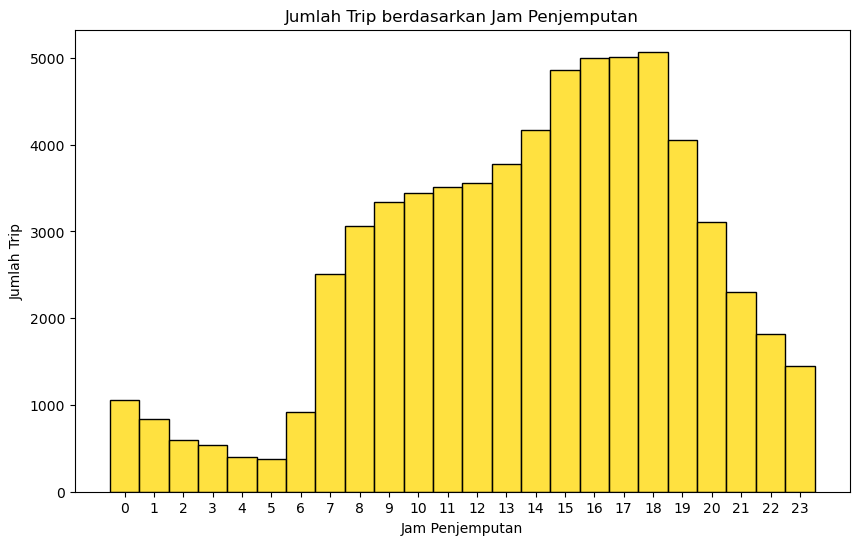

In [550]:
plt.figure(figsize=(10, 6))
sns.histplot(df['pickup_hour'], bins=range(0, 24), discrete=True, color='#FFD700')
plt.title("Jumlah Trip berdasarkan Jam Penjemputan")
plt.xlabel('Jam Penjemputan')
plt.ylabel('Jumlah Trip')
plt.xticks(range(0, 24))
plt.show()

In [ ]:
# membuat table pivot untuk stackbar jam penjemputan
pivot_df = df.pivot_table(index='pickup_hour', columns='distance_category', aggfunc='size', fill_value=0)

<Figure size 1000x600 with 0 Axes>

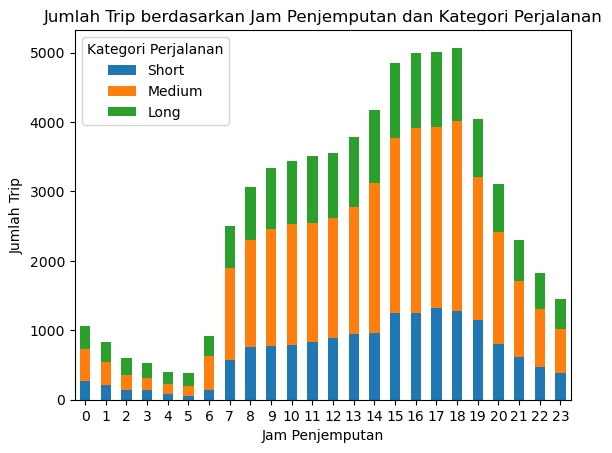

In [555]:
# membuat Stackbar untuk membandingkan dengan banyaknya tiap kategori perjalanan
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)

plt.title('Jumlah Trip berdasarkan Jam Penjemputan dan Kategori Perjalanan')
plt.xlabel('Jam Penjemputan')
plt.ylabel('Jumlah Trip')
plt.legend(title='Kategori Perjalanan', loc='upper left')
plt.xticks(rotation = 0)
plt.show()

Berdasarkan histogram dan stackbar diatas dapat terlihat bahwa jumlah trip meningkat pesat pada **pukul 7** dan terus meningkat hingga **pukul 18**, dan di dominasi perjalanan dengan kategori **Medium**.

In [560]:
# Mengubah format pickup datetime menjadi jam pickup
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['pickup_day'] = df['lpep_pickup_datetime'].dt.day

# Jumlah pickup per jam selama bulan Januari 2023
df['pickup_day'].value_counts().sort_index()

pickup_day
1     1392
2     1491
3     2007
4     2255
5     2295
6     2424
7     2041
8     1560
9     2096
10    2059
11    2332
12    2394
13    2420
14    2046
15    1675
16    1506
17    2136
18    2224
19    2506
20    2367
21    2058
22    1710
23    2261
24    2269
25    2549
26    2501
27    2322
28    1949
29    1577
30    2129
31    2207
Name: count, dtype: int64

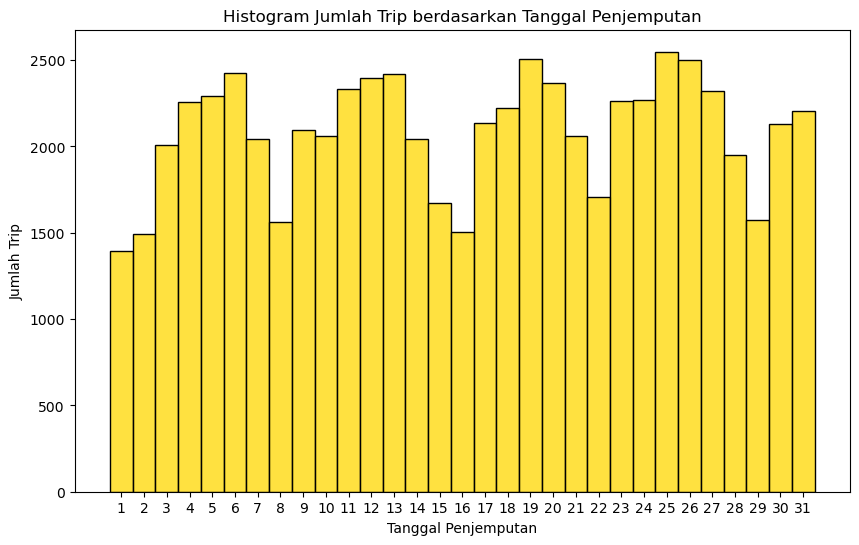

In [561]:
plt.figure(figsize=(10, 6))
sns.histplot(df['pickup_day'], bins=range(0, 31), discrete=True, color='#FFD700')
plt.title("Histogram Jumlah Trip berdasarkan Tanggal Penjemputan")
plt.xlabel('Tanggal Penjemputan')
plt.ylabel('Jumlah Trip')
plt.xticks(range(1, 32))
plt.show()

In [564]:
# membuat table pivot untuk stackbar hari penjemputan
pivot_df = df.pivot_table(index='pickup_day', columns='distance_category', aggfunc='size', fill_value=0)

<Figure size 1000x600 with 0 Axes>

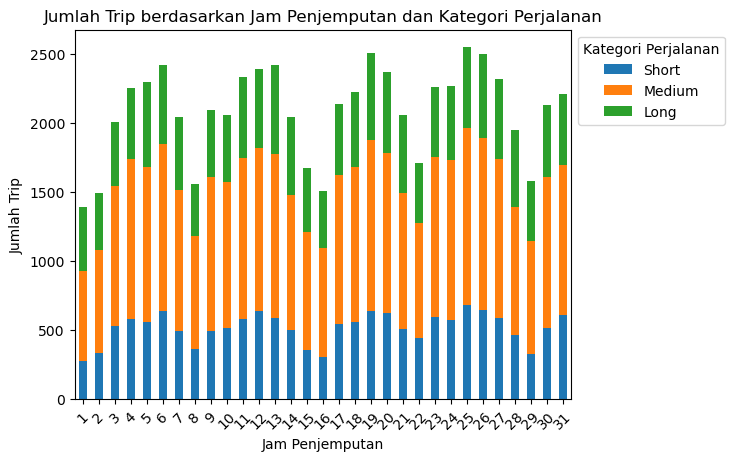

In [569]:
# membuat Stackbar untuk membandingkan dengan banyaknya tiap kategori perjalanan
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)

plt.title('Jumlah Trip berdasarkan Jam Penjemputan dan Kategori Perjalanan')
plt.xlabel('Jam Penjemputan')
plt.ylabel('Jumlah Trip')
plt.legend(title='Kategori Perjalanan',bbox_to_anchor=(1, 1))
plt.xticks(rotation = 45)
plt.show()

Terlihat pada Histogram diatas bahwa terdapat **trend yang berulang** pada tanggal di setiap minggunya, oleh karena itu mari kita lihat jika tanggal **dikelompokan pada nama hari** nya, dan untuk kategori perjalanan tetap tersebar secara merata pada setiap tanggal.

In [39]:
# Mengubah format pickup datetime menjadi jam pickup
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['pickup_day_name'] = df['lpep_pickup_datetime'].dt.day_name()

# Jumlah pickup per jam selama bulan Januari 2023
df['pickup_day_name'].value_counts().sort_index()

pickup_day_name
Friday        9535
Monday        9481
Saturday      8094
Sunday        7912
Thursday      9697
Tuesday      10678
Wednesday     9361
Name: count, dtype: int64

In [40]:
# rata-rata perjalanan per nama hari
average_value = df['pickup_day_name'].value_counts().mean()
average_value

9251.142857142857

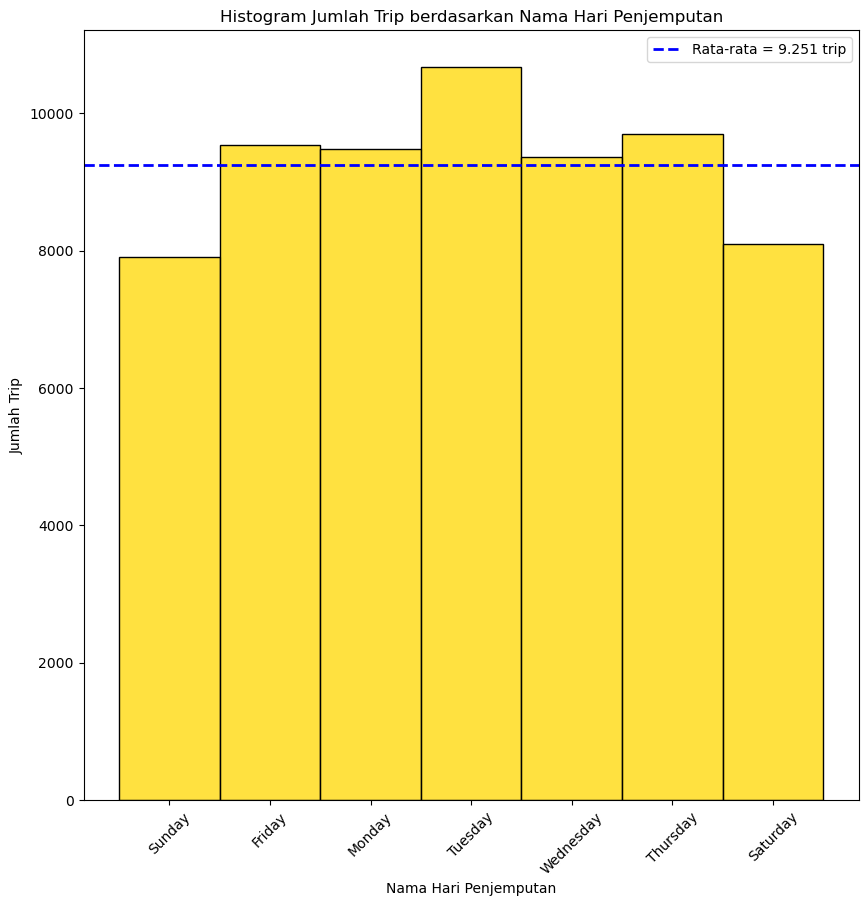

In [42]:
plt.figure(figsize=(10, 10))
sns.histplot(df['pickup_day_name'], bins=range(0, 7), discrete=True, color='#FFD700')
plt.axhline(y=average_value, color='blue', linestyle='dashed', linewidth=2, label='Rata-rata = 9.251 trip')
plt.title("Histogram Jumlah Trip berdasarkan Nama Hari Penjemputan")
plt.xlabel('Nama Hari Penjemputan')
plt.ylabel('Jumlah Trip')
plt.xticks(range(0, 7), rotation = 45)
plt.legend()
plt.show()

Pada histogram diatas terlihat jelas bahwa penumpang memiliki kecenderungan yang tinggi diatas rata-rata untuk menaiki taksi pada **hari Selasa**, dan cenderung rendah dan dibawah rata-rata pada hari Minggu dan Sabtu.

## Lokasi penggunaan taksi paling banyak

In [431]:
# Jumlah pickup per Borough selama bulan Januari 2023
df['pickup_borough'].value_counts()

pickup_borough
Manhattan        38678
Queens           16683
Brooklyn          8494
Bronx              894
Staten Island        9
Name: count, dtype: int64

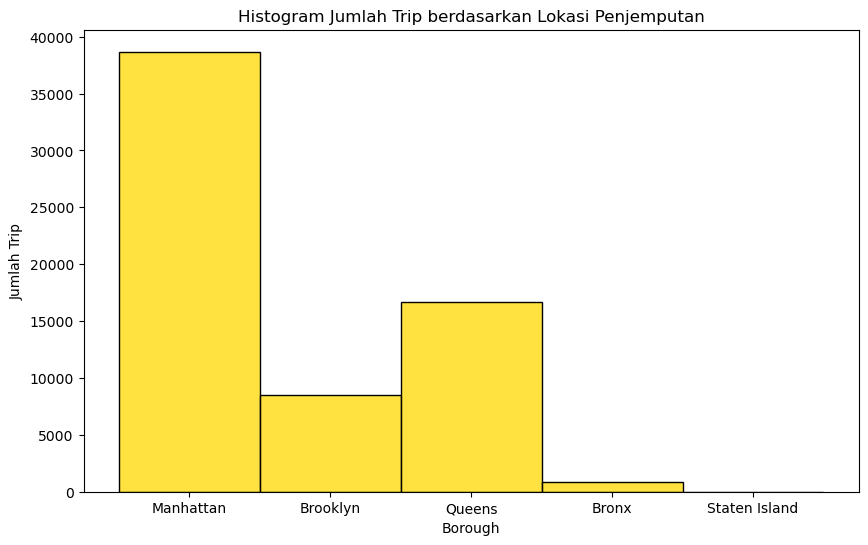

In [432]:
plt.figure(figsize=(10, 6))
sns.histplot(df['pickup_borough'], color='#FFD700')
plt.title("Histogram Jumlah Trip berdasarkan Lokasi Penjemputan")
plt.xlabel('Borough')
plt.ylabel('Jumlah Trip')
plt.show()

Berdasarkan histogram diatas dapat terlihat bahwa jumlah trip pada **Borough Manhattan** sangat tinggi (sebanyak 39.436 perjalanan) dibandingkan borough-borough lainnya, yaitu Borough Queens di posisi ke-2 (17991 perjalanan), dan Borough Brooklyn pada posisi ke-3 (9.336 perjalanan).

## Pendapatan rata-rata pada tiap Borough

Jika melihat pada data jumlah perjalanan per Borough diatas maka akan jelas bahwa Borough manhattan akan memiliki total Pendapatan paling tinggi dibandingkan dengan keempat borough lainnya.

akan tetapi, apakah rata-rata pendapatannya akan tetap lebih tinggi?

In [433]:
# rata-rata pendapatan tiap Borough
avg_total_amount_by_borough = df.groupby('pickup_borough')['total_amount'].mean().sort_values(ascending=False)
avg_total_amount_by_borough

pickup_borough
Brooklyn         26.289091
Staten Island    25.378889
Bronx            23.859116
Queens           21.904542
Manhattan        20.591348
Name: total_amount, dtype: float64

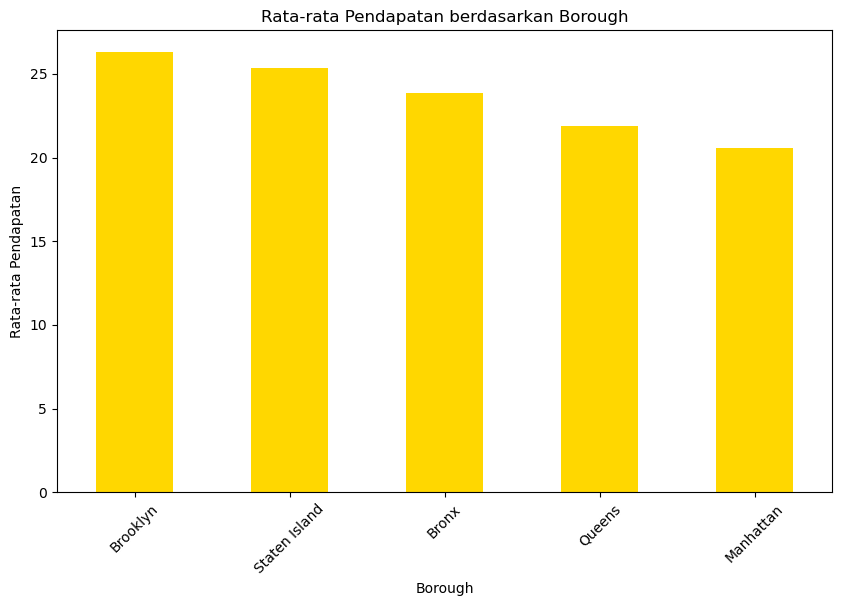

In [434]:
plt.figure(figsize=(10, 6))
avg_total_amount_by_borough.plot(kind='bar', color='#FFD700')
plt.title('Rata-rata Pendapatan berdasarkan Borough')
plt.xlabel('Borough')
plt.ylabel('Rata-rata Pendapatan')
plt.xticks(rotation=45)
plt.show()

Pada histogram diatas jadi terlihat jelas bahwa Borough Manhattan yang memiliki jumlah perjalanan paling tinggi, ternyata memiliki rata-rata pendapatan yang paling rendah dibandingkan daerah lainnya (sekitar 20,59$ per perjalanan).

**Rata-rata pendapatan tertinggi** diperoleh di Borough Brooklyn dengan 26.28$ per perjalanan, hal ini bagus mengingat daerah Brooklyn menduduki urutan ke-3 untuk jumlah perjalanan dalam satu bulan.

Sedangkan Staten Island yang memiliki jumlah perjalanan paling sedikit memiliki rata-rata pendapatan perjalanan kedua tertinggi, yaitu 25,37$ per perjalanan. Hal ini dimungkinkan karena Staten Island memiliki data trip yang sangat sedikit sekali (9 trip) dibandingkan daerah-daerah lainnya.

In [435]:
# persentase perjalanan pada tiap Borough pada bulan Januari 2023
df['pickup_borough'].value_counts() / len(df['pickup_borough']) * 100

pickup_borough
Manhattan        59.726984
Queens           25.762068
Brooklyn         13.116526
Bronx             1.380524
Staten Island     0.013898
Name: count, dtype: float64

Terlihat pada persentase diatas bahwa trip di Staten Island hanya 0,013% dari jumlah keseluruhan perjalanan Taksi di bulan Januari 2023, dan kemungkinan besar bahwa rata-rata pendapatannya tidak akan jauh berbeda dari borough-borough lainnya jika Staten Island memiliki jumlah perjalanan sebanyak daerah lainnya (masih sekitar 25$ per perjalanan).

## Jumlah dan Rata-rata Tips pada tiap Borough

uang tips merupakan kebiasaan umum yang dapat memengaruhi pendapatan para pengemudi taksi, oleh karena itu penting juga untuk melihat daerah mana saja yang banyak memberikan uang tips dan rata-rata jumlahnya.

untuk jumlah uang tips diperkirakan akan sebanding dengan jumlah perjalanan pada tiap Borough, yang berarti Borough Manhattan seharusnya memiliki Jumlah uang tips terbanyak diantara semua daerah.

In [436]:
# Jumlah uang tips tiap Borough
sum_tip_amount_by_borough = df.groupby('pickup_borough')['tip_amount'].sum().sort_values(ascending=False)
sum_tip_amount_by_borough

pickup_borough
Manhattan        88327.52
Queens           27399.59
Brooklyn         25563.21
Bronx              850.34
Staten Island       12.26
Name: tip_amount, dtype: float64

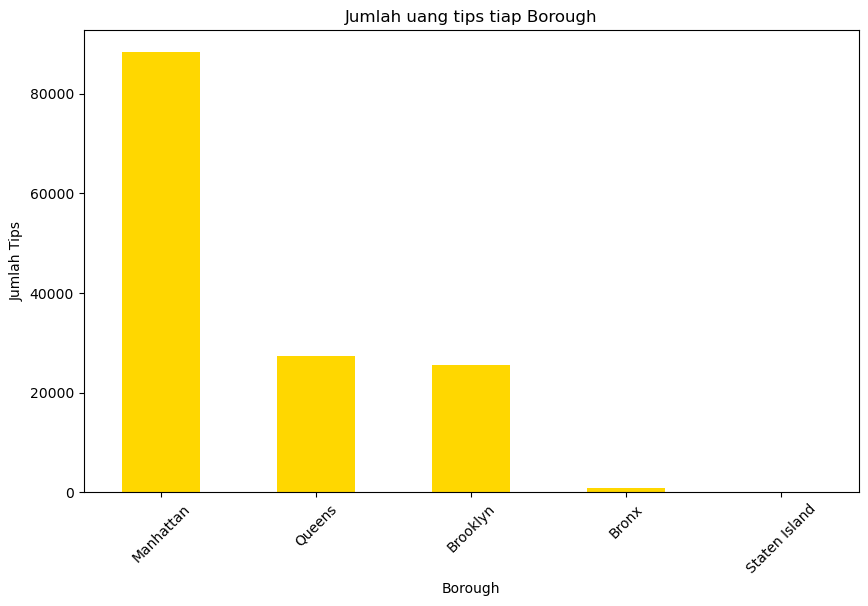

In [437]:
plt.figure(figsize=(10, 6))
sum_tip_amount_by_borough.plot(kind='bar', color='#FFD700')
plt.title('Jumlah uang tips tiap Borough')
plt.xlabel('Borough')
plt.ylabel('Jumlah Tips')
plt.xticks(rotation=45)
plt.show()

Sesuai dengan perkiraan bahwa Jumlah uang Tips yang diberikan di Manhattan memiliki jumlah paling banyak yang sebanding dengan jumlah perjalanan yang banyak pula di Borough tersebut. 

Mari kita lihat rata-rata uang tips yang diberikan, apakah Manhattan masih paling tinggi?

In [438]:
# rata-rata Jumlah uang tips tiap Borough
avg_tip_amount_by_borough = df.groupby('pickup_borough')['tip_amount'].mean().sort_values(ascending=False)
avg_tip_amount_by_borough

pickup_borough
Brooklyn         3.009561
Manhattan        2.283663
Queens           1.642366
Staten Island    1.362222
Bronx            0.951163
Name: tip_amount, dtype: float64

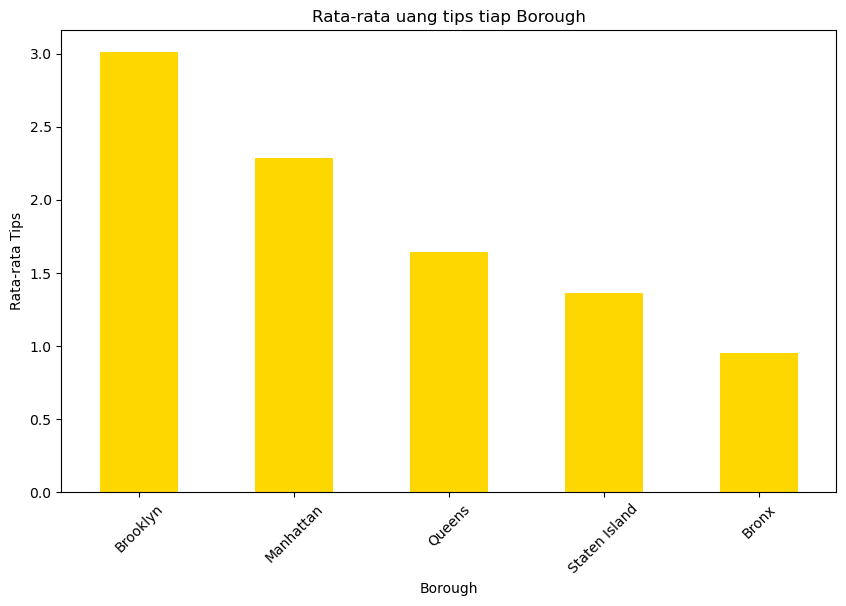

In [439]:
plt.figure(figsize=(10, 6))
avg_tip_amount_by_borough.plot(kind='bar', color='#FFD700')
plt.title('Rata-rata uang tips tiap Borough')
plt.xlabel('Borough')
plt.ylabel('Rata-rata Tips')
plt.xticks(rotation=45)
plt.show()

Pada histogram diatas terlihat bahwa Borough Brooklyn memberikan uang tips paling besar, yaitu sebesar **3,00\$** per perjalanan, hal ini dapat menjelaskan mengapa Borough Brooklyn dapat menduduki urutan pertama dalam rata-rata pendapatan per perjalanan.

dan Manhattan berada diposisi kedua dengan besar uang tips 2,28\$ per perjalanan, yang tidak buruk mengingat bahwa Manhattan memiliki kuantitas perjalanan terbanyak dibandingkan daerah lainnya.

# Kesimpulan dan Rekomendasi 

## Kesimpulan
Dari analisis diatas, kita bisa membuat kesimpulan bahwa:
* Pukul 7 hingga pukul 18 adalah waktu tersibuk; 
* Hari Selasa memiliki jumlah perjalanan yang tinggi dan diatas rata-rata;
* Borough Manhattan memiliki jumlah trip yang sangat tinggi dibandingkan dengan daerah lainnya (59,72%);
* Daerah Brooklyn memiliki rata-rata pendapatan tertinggi yaitu (26.28$);

* Daerah Brooklyn juga memberikan rata-rata uang tips tertinggi yaitu 2,81$ per perjalanan;

* Borough Staten Island memiliki rata-rata pendapatan kedua tertinggi dengan jumlah 25,37$ , walaupun memiliki jumlah perjalanan yang sangat sedikit (9 perjalanan);
* Sesuai dengan banyaknya perjalanan, Jumlah uang tips di daerah Manhattan memiliki jumlah terbanyak dan memiliki rata-rata kedua terbanyak (2,26\$ per perjalanan).

## Rekomendasi
1. Pengemudi taksi diarahkan untuk bekerja pada jam-jam dan hari sibuk yaitu sekitar pukul 7 hingga 18 dan terutama pada hari Selasa.
1. Penyedia jasa layanan taksi juga mengarahkan pada daerah-daerah dengan permintaan tinggi yaitu Borough Manhattan, pada waktu tersibuk.
1. Dilakukan promosi yang agresif pada daerah-daerah dengan peminatan taksi yang sedikit yaitu Staten Island dan Brooklyn dimana masih banyak peluang pasar yang masih bisa dimaksimalkan sehingga dapat membuka peluang baru untuk mendapatkan pelanggan baru pada daerah tersebut. 

Besar harapan tim analyst bahwa analisis ini dapat memberikan insight baru akan bagaimana penyedia layanan taksi di New York dapat meningkatkan layanan dan industrinya.